In [3]:
from panpe import InferenceModel, ExpDataset, ROOT_DIR

In [4]:
model = InferenceModel.from_config("panpe-2layers-xrr")

C:\Users\49162\PycharmProjects\panpe\panpe\config_utils\config.py:36: UserWarning: CUDA is not available. Setting device to cpu.
  warnings.warn("CUDA is not available. Setting device to cpu.")


Loaded model C:\Users\49162\PycharmProjects\panpe\saved_models\model_panpe-2layers-xrr.pt


In [5]:
exp_dset = ExpDataset(ROOT_DIR / "data/xrr_data.h5", device="cpu")

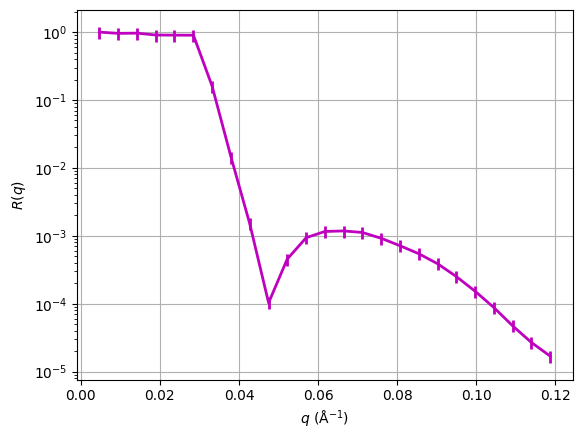

In [5]:
exp_dset[110].plot()

PANPE-IS:   0%|          | 0/500 [00:00<?, ? Neff/s]

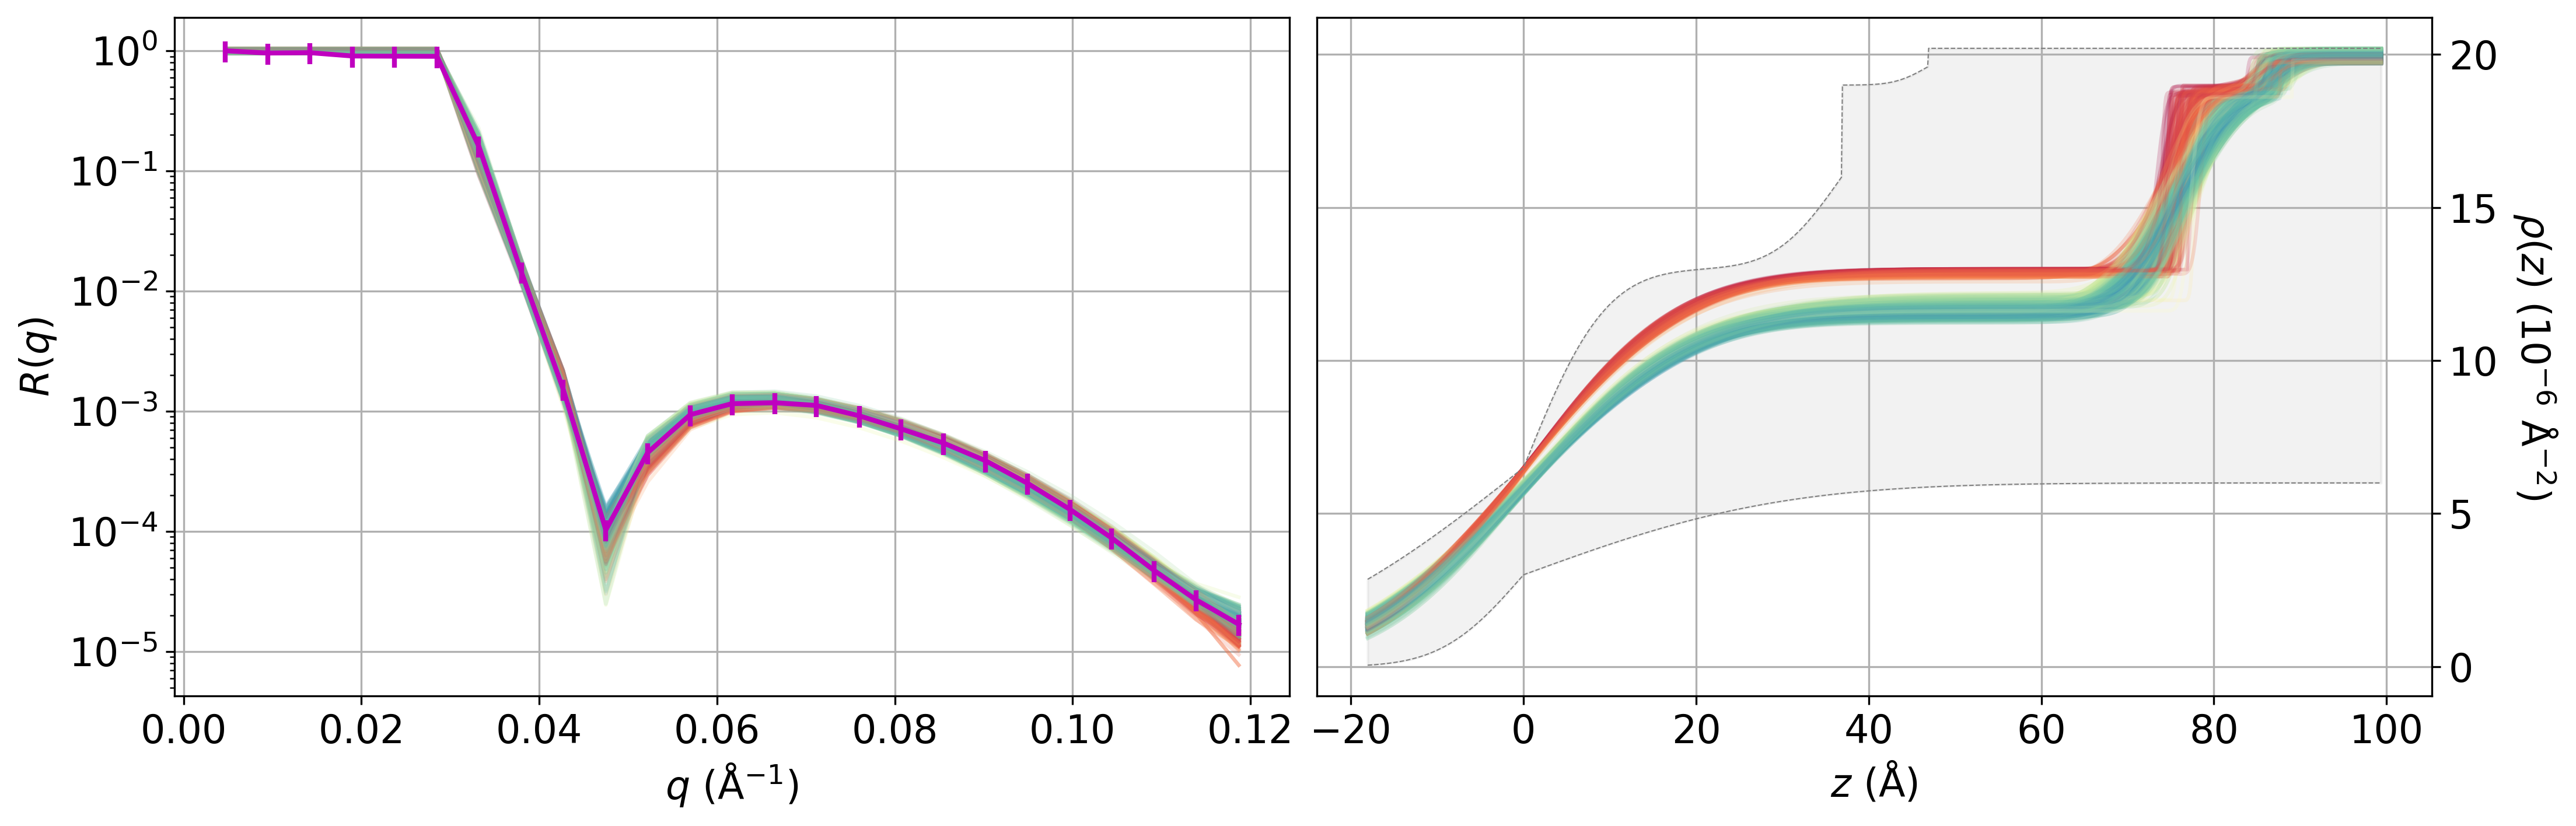

In [6]:
# PANPE-IS
res = model(exp_dset[110])
res.plot_sampled_profiles(show_prior=True)

PANPE-IS:   0%|          | 0/1000 [00:00<?, ? Neff/s]

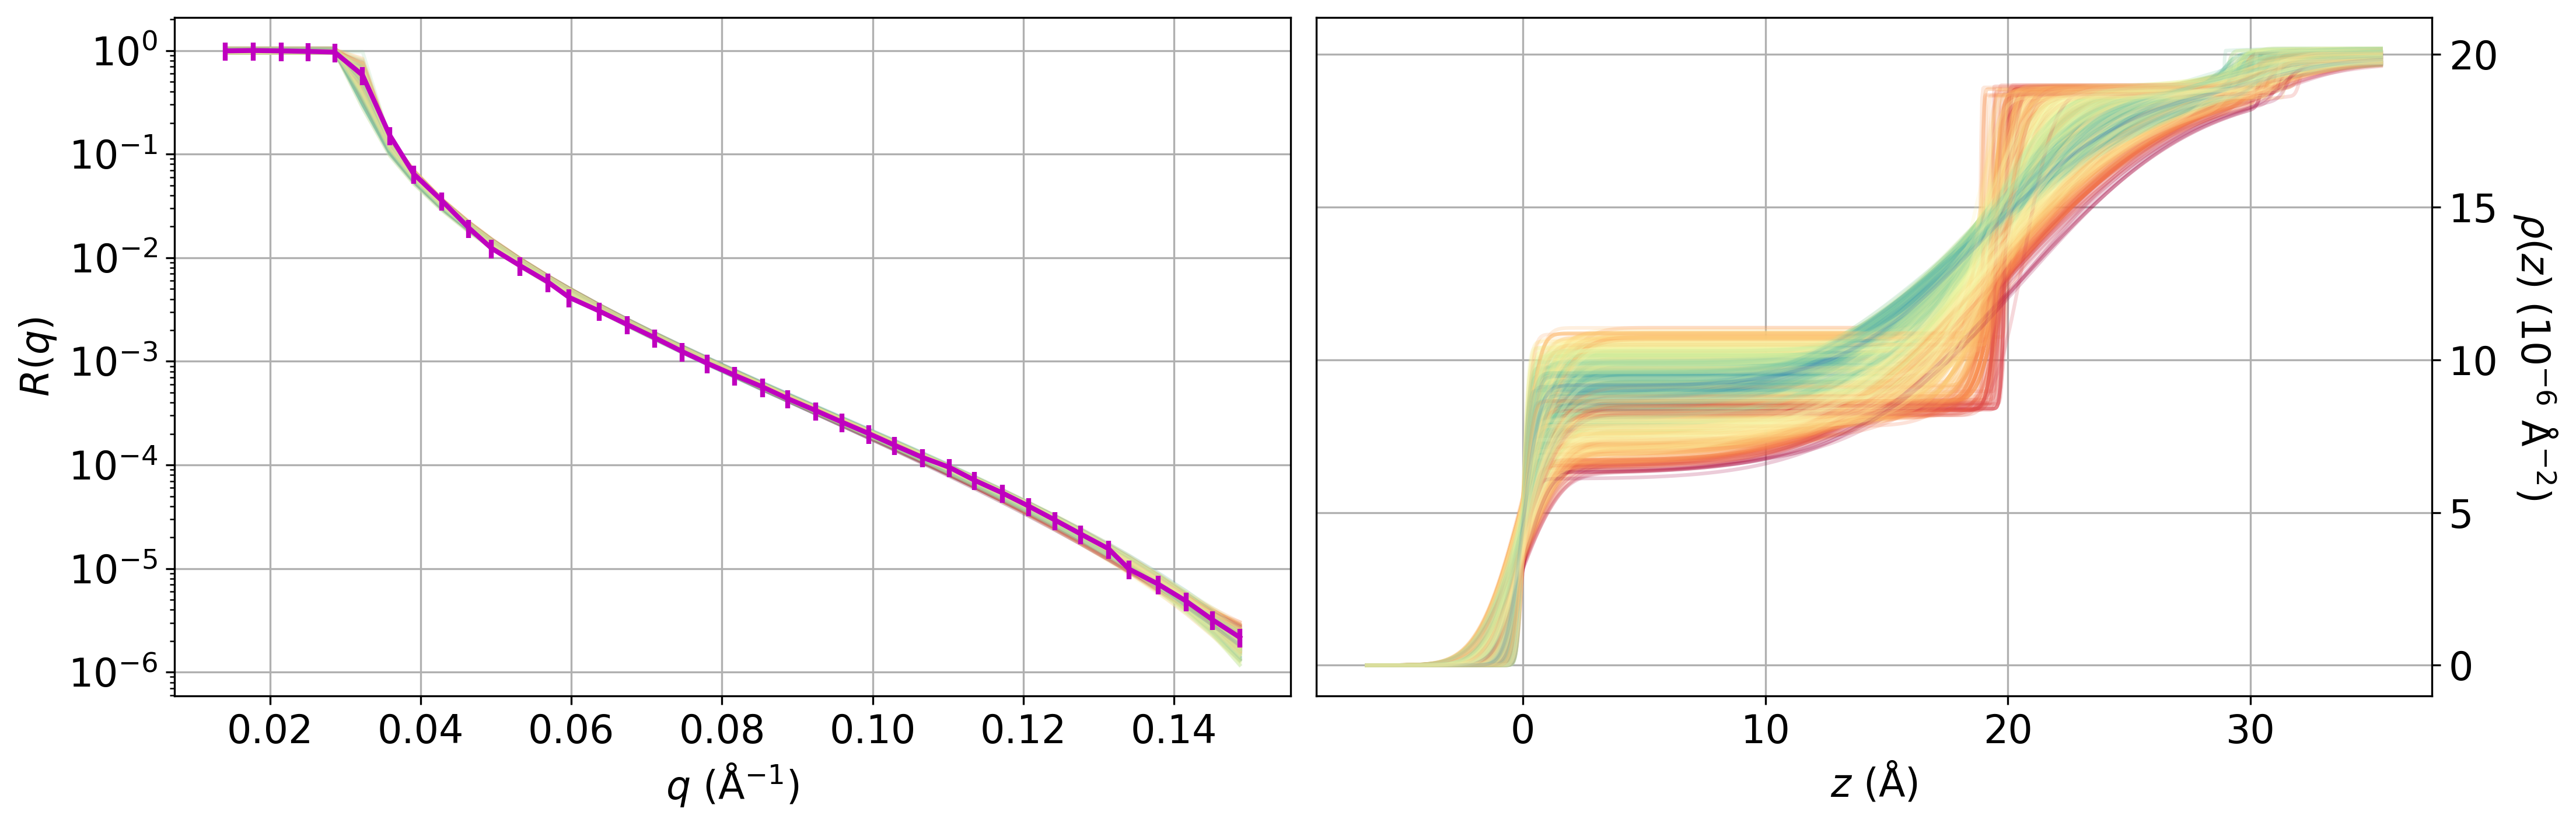

In [7]:
# PANPE-IS
res = model(exp_dset[150], target_neff=1000)
res.plot_sampled_profiles()

In [8]:
print(f"PANPE-IS sample efficiency: {res.importance_sampling.eff:.2e}")
print(f"Conventional IS sample efficiency estimation: {res.get_snis_sample_eff_estimation():.2e}")

PANPE-IS sample efficiency: 2.07e-02
Conventional IS sample efficiency estimation: 2.45e-03


PANPE-IS:   0%|          | 0/500 [00:00<?, ? Neff/s]

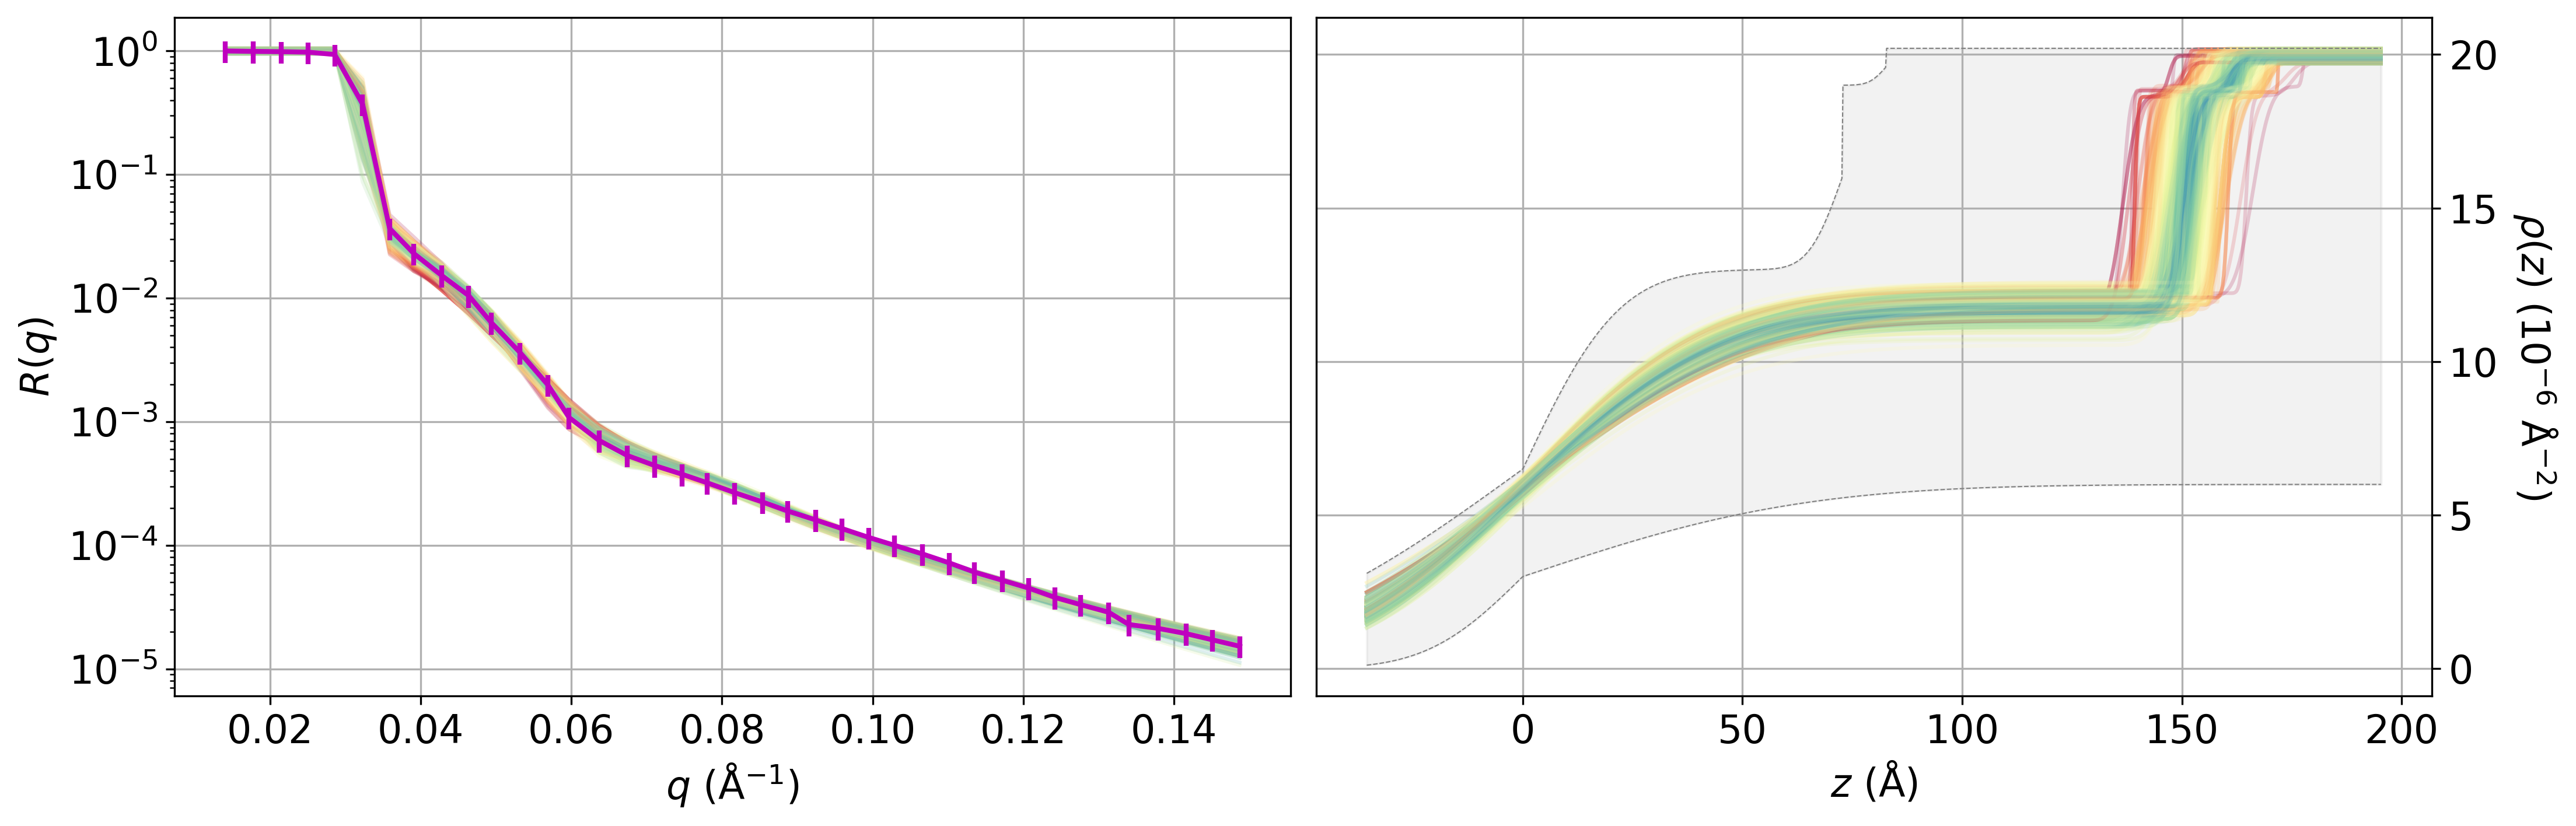

In [9]:
# PANPE-IS
res = model(exp_dset[200])
res.plot_sampled_profiles(show_prior=True)

In [21]:
# mean and std of the sampled parameters
res.importance_sampling.params.mean(0), res.importance_sampling.params.std(0)

(tensor([ 1.4816e+02,  1.1004e+01,  3.3678e+01,  2.5783e+00,  1.5455e+00,
          1.1815e+01,  1.8819e+01,  1.9934e+01, -3.2054e-04,  9.9251e-01]),
 tensor([3.6082e+00, 5.8524e-01, 2.1373e+00, 1.3982e+00, 8.9200e-01, 4.1362e-01,
         1.1918e-01, 1.5038e-01, 4.0697e-04, 2.6173e-02]))